In [47]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

from sklearn import tree

In [48]:
df = pd.read_csv('Bologna/airbnb_bologna_0310_2016-02-07.csv')
df.isnull().sum()


room_id                   0
survey_id                 0
host_id                   0
room_type                 0
country                   0
city                      0
borough                 736
neighborhood              0
reviews                   0
overall_satisfaction    122
accommodates             26
bedrooms                  1
bathrooms                28
price                     0
minstay                  30
name                    736
last_modified             0
latitude                  0
longitude                 0
location                  0
dtype: int64

In [49]:
df.drop(['room_id', 'survey_id', 'host_id', 'country', 'city', 'borough', 'neighborhood', 'reviews', 'name', 'last_modified', 'latitude', 'longitude', 'location'], axis=1, inplace=True)


In [50]:
df['overall_satisfaction'].fillna(df['overall_satisfaction'].mode()[0], inplace=True)
df['accommodates'].fillna(df['accommodates'].mode()[0], inplace=True)
df['bedrooms'].fillna(df['bedrooms'].mode()[0], inplace=True)
df['bathrooms'].fillna(df['bathrooms'].mode()[0], inplace=True)
df['minstay'].fillna(df['minstay'].mode()[0], inplace=True)

In [51]:
df.isnull().sum()

room_type               0
overall_satisfaction    0
accommodates            0
bedrooms                0
bathrooms               0
price                   0
minstay                 0
dtype: int64

In [52]:
df.describe()

,overall_satisfaction,accommodates,bedrooms,bathrooms,price,minstay
count,736.000000,736.000000,736.000000,736.000000,736.000000,736.000000
mean,4.726902,2.607337,1.084239,1.101902,65.985054,1.596467
std,0.380846,0.996265,0.527834,0.385727,41.337878,0.958422
min,2.500000,1.000000,0.000000,0.000000,11.000000,1.000000
25%,4.500000,2.000000,1.000000,1.000000,40.000000,1.000000
50%,5.000000,2.000000,1.000000,1.000000,58.000000,1.000000
75%,5.000000,3.000000,1.000000,1.000000,80.000000,2.000000
max,5.000000,5.000000,6.000000,7.000000,749.000000,15.000000


In [53]:
def change_overall_satisfaction(overall_satisfaction):
    if overall_satisfaction > 4:
        return 'a. Excellent'
    elif overall_satisfaction > 3:
        return 'b. Very good'
    elif overall_satisfaction > 2:
        return 'c. Good'
    elif overall_satisfaction > 1:
        return 'd. Fair'
    else:
        return 'e. Poor'

In [54]:
df['overall_satisfaction'] = df['overall_satisfaction'].apply(change_overall_satisfaction)

In [55]:
df = pd.get_dummies(df, columns=['room_type'])

In [56]:
df.head()

,overall_satisfaction,accommodates,bedrooms,bathrooms,price,minstay,room_type_Entire home/apt,room_type_Private room,room_type_Shared room
0,a. Excellent,2.0,1.0,1.0,43.0,1.0,0,1,0
1,a. Excellent,5.0,0.0,1.0,79.0,1.0,1,0,0
2,a. Excellent,5.0,3.0,2.0,138.0,3.0,1,0,0
3,a. Excellent,4.0,2.0,1.0,75.0,1.0,1,0,0
4,a. Excellent,2.0,1.0,1.0,43.0,1.0,0,1,0


In [57]:
from sklearn import tree

In [58]:
from sklearn.tree import DecisionTreeClassifier, export_graphviz

from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

In [59]:
features = df.drop(['overall_satisfaction'], axis=1)
target = df[['overall_satisfaction']]

In [60]:
naive_model = DecisionTreeClassifier(random_state=42)
param_model = DecisionTreeClassifier(max_depth=5, min_samples_split=10, min_samples_leaf=10, random_state=42)

In [61]:
def train_and_predict(model, features, target):
    X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.33, random_state=42)
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    print("accuracy score: %.2f" % accuracy_score(y_test, y_pred))
    (tn, fp, fn, tp) = confusion_matrix(y_test, y_pred).ravel()
    print("confusion matrix")
    print("tn, fp, fn, tp")
    print(tn, fp, fn, tp)

In [62]:
train_and_predict(naive_model, features, target)

accuracy score: 0.84


ValueError: too many values to unpack (expected 4)

In [64]:
from io import StringIO
dot_data = StringIO()
export_graphviz(naive_model, out_file=dot_data, filled=True, rounded=True, special_characters=True)

In [67]:
import pydotplus
from IPython.display import Image  

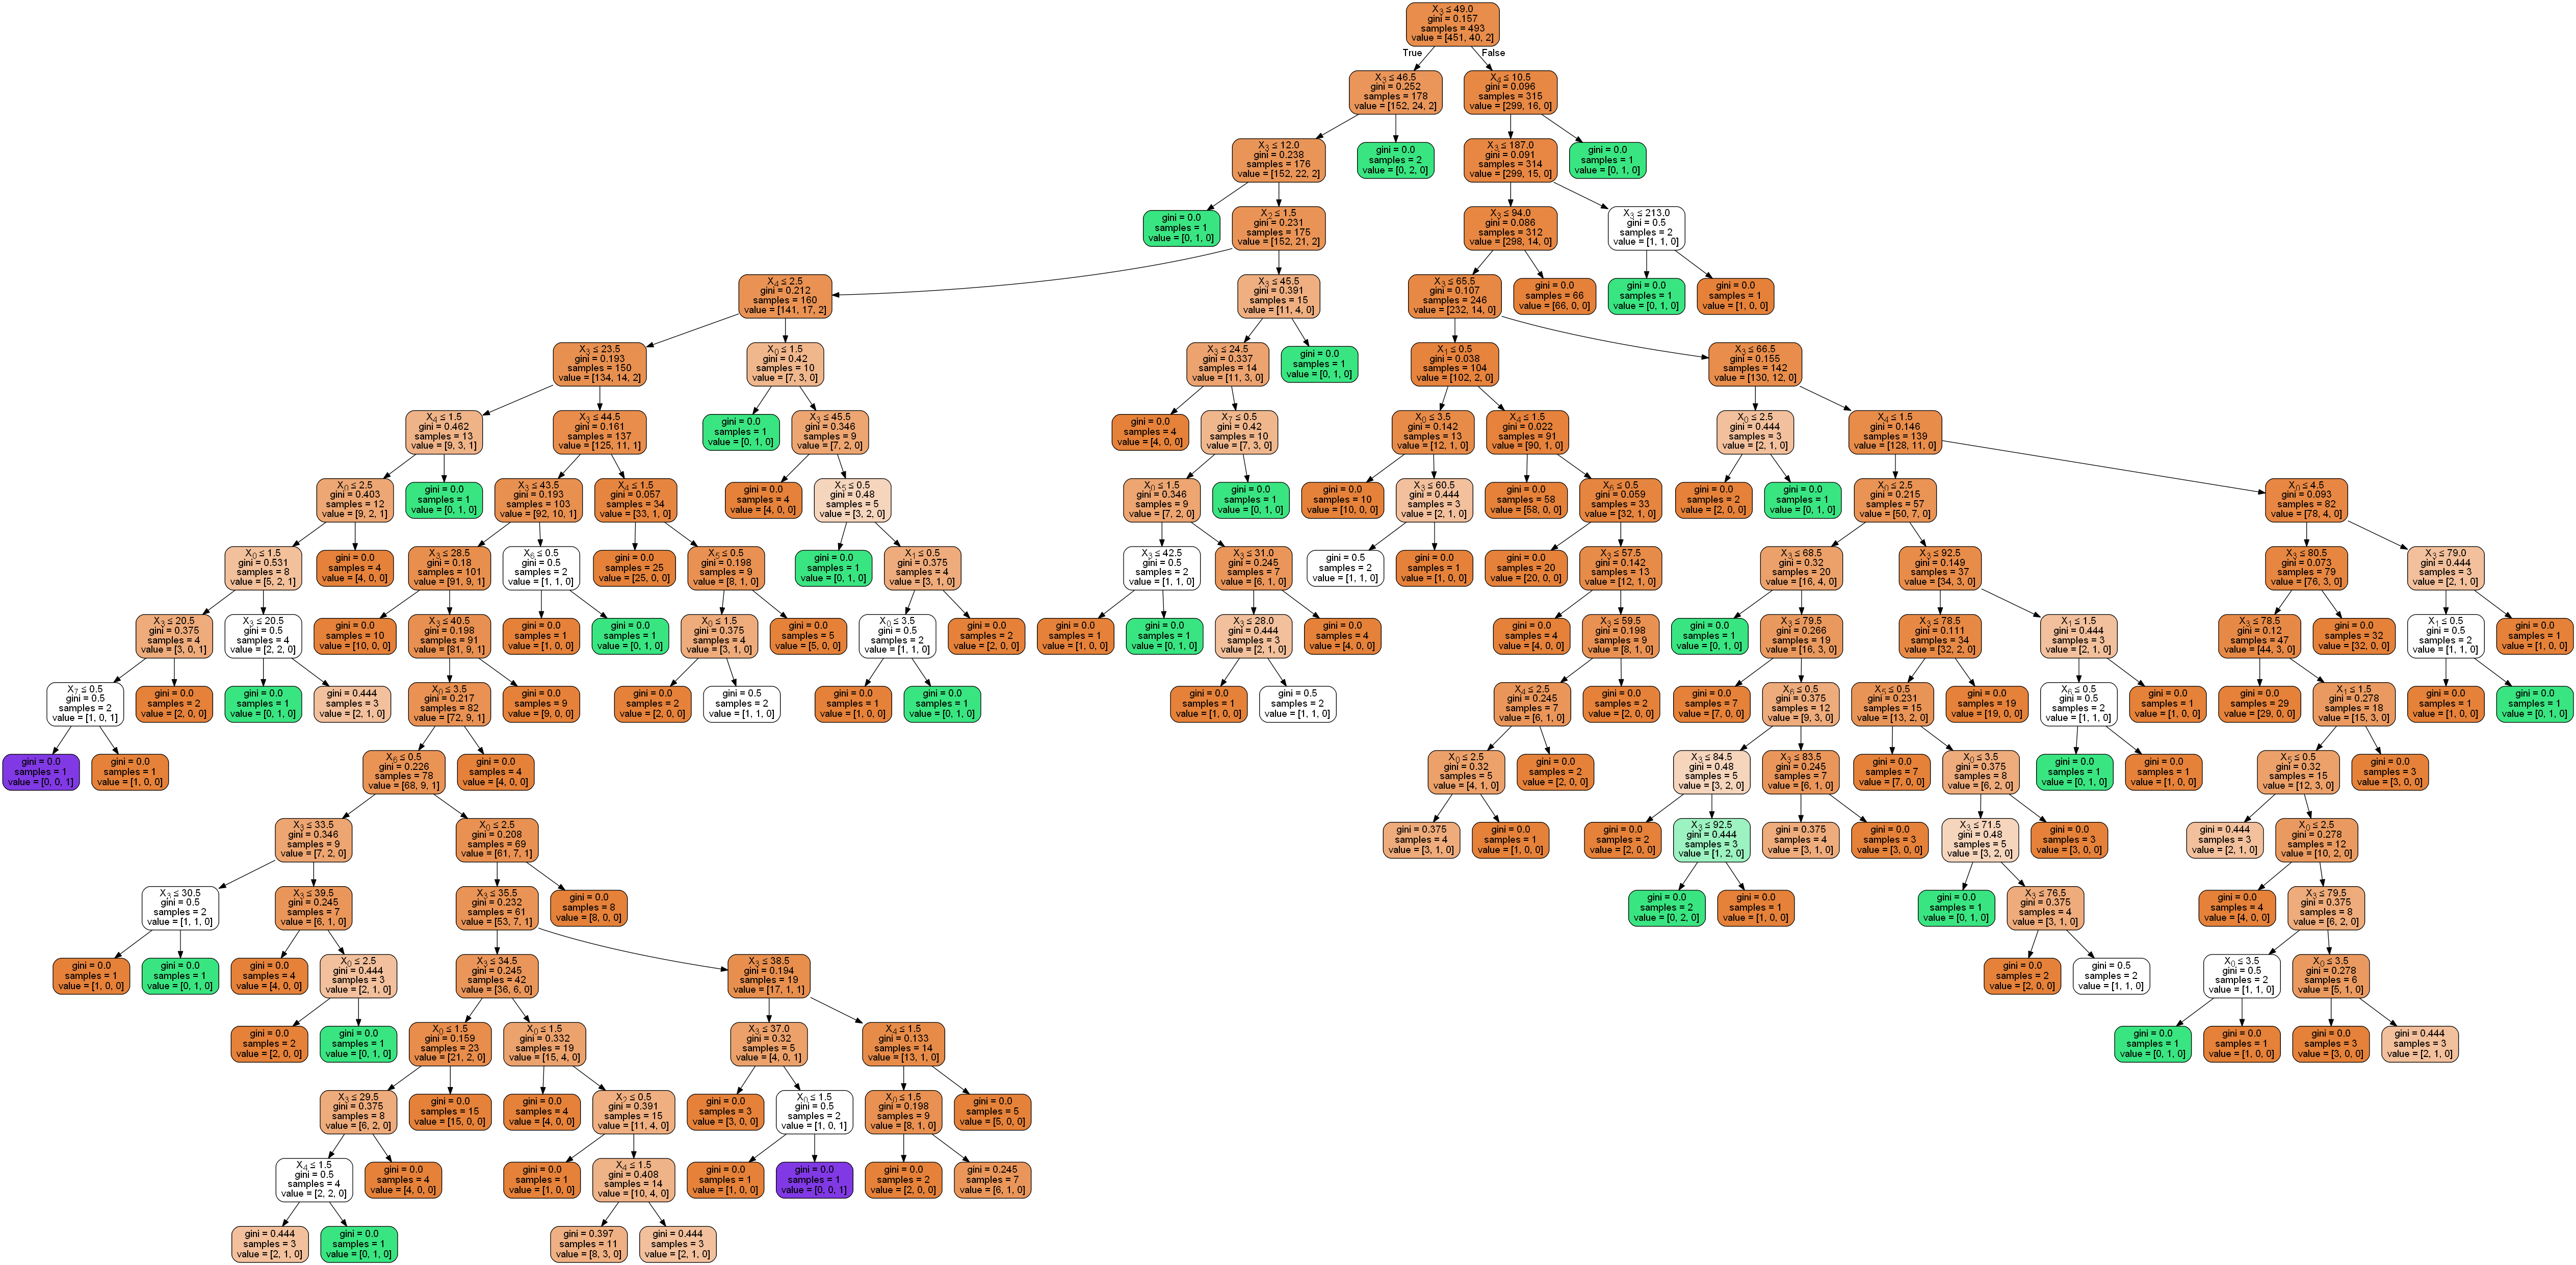

In [68]:
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())
Image(graph.create_png())

In [70]:
with open("naive_model.dot", "w") as f:
    f = tree.export_graphviz(naive_model, out_file = f)

In [71]:
train_and_predict(param_model, features, target)

accuracy score: 0.91


ValueError: too many values to unpack (expected 4)

In [72]:
from io import StringIO
dot_data = StringIO()
export_graphviz(param_model, out_file=dot_data, filled=True, rounded=True, special_characters=True)

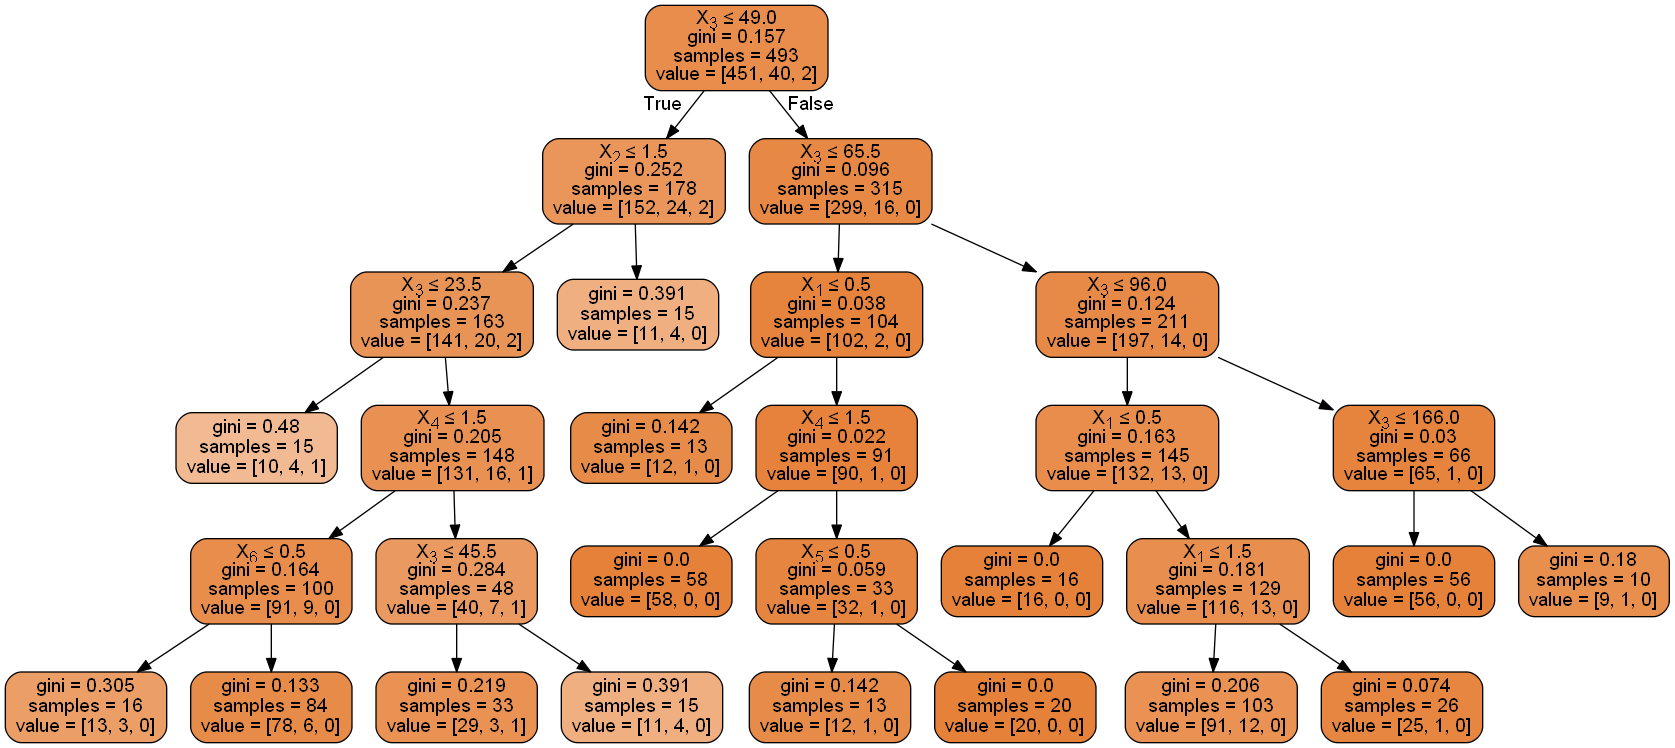

In [73]:
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())
Image(graph.create_png())

In [74]:
with open("param_model.dot", "w") as f:
    f = tree.export_graphviz(naive_model, out_file = f)

In [75]:
xtr = features[:100]
xte = features[100:]
ytr = target[:100]
yte = target[100:]

In [76]:
model = DecisionTreeClassifier()
model.fit(xtr, ytr)
pred = model.predict(xte)

In [93]:
pred

array(['a. Excellent', 'a. Excellent', 'a. Excellent', 'a. Excellent',
       'a. Excellent', 'a. Excellent', 'a. Excellent', 'a. Excellent',
       'b. Very good', 'a. Excellent', 'a. Excellent', 'a. Excellent',
       'a. Excellent', 'a. Excellent', 'a. Excellent', 'a. Excellent',
       'a. Excellent', 'a. Excellent', 'a. Excellent', 'a. Excellent',
       'a. Excellent', 'a. Excellent', 'a. Excellent', 'a. Excellent',
       'a. Excellent', 'a. Excellent', 'a. Excellent', 'a. Excellent',
       'a. Excellent', 'a. Excellent', 'a. Excellent', 'b. Very good',
       'a. Excellent', 'a. Excellent', 'a. Excellent', 'a. Excellent',
       'a. Excellent', 'a. Excellent', 'a. Excellent', 'a. Excellent',
       'a. Excellent', 'a. Excellent', 'a. Excellent', 'a. Excellent',
       'a. Excellent', 'a. Excellent', 'a. Excellent', 'a. Excellent',
       'a. Excellent', 'b. Very good', 'a. Excellent', 'a. Excellent',
       'a. Excellent', 'a. Excellent', 'a. Excellent', 'a. Excellent',
      

In [78]:
from sklearn.metrics import classification_report, confusion_matrix

In [80]:
print("Trained Score: ")
print(confusion_matrix(yte,pred))
print(classification_report(yte,pred))

Trained Score: 
[[532  50   0]
 [ 45   3   0]
 [  6   0   0]]
              precision    recall  f1-score   support

a. Excellent       0.91      0.91      0.91       582
b. Very good       0.06      0.06      0.06        48
     c. Good       0.00      0.00      0.00         6

 avg / total       0.84      0.84      0.84       636



C:\Users\user\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


In [81]:
from sklearn.ensemble import RandomForestClassifier

In [84]:
tree = RandomForestClassifier()
model = tree.fit(xtr,ytr)

C:\Users\user\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  


In [85]:
pred = model.predict(xte)

In [86]:
pred

array(['a. Excellent', 'a. Excellent', 'a. Excellent', 'a. Excellent',
       'a. Excellent', 'a. Excellent', 'a. Excellent', 'a. Excellent',
       'b. Very good', 'a. Excellent', 'a. Excellent', 'a. Excellent',
       'a. Excellent', 'a. Excellent', 'a. Excellent', 'a. Excellent',
       'a. Excellent', 'a. Excellent', 'a. Excellent', 'a. Excellent',
       'a. Excellent', 'a. Excellent', 'a. Excellent', 'a. Excellent',
       'a. Excellent', 'a. Excellent', 'a. Excellent', 'a. Excellent',
       'a. Excellent', 'a. Excellent', 'a. Excellent', 'b. Very good',
       'a. Excellent', 'a. Excellent', 'a. Excellent', 'a. Excellent',
       'a. Excellent', 'a. Excellent', 'a. Excellent', 'a. Excellent',
       'a. Excellent', 'a. Excellent', 'a. Excellent', 'a. Excellent',
       'a. Excellent', 'a. Excellent', 'a. Excellent', 'a. Excellent',
       'a. Excellent', 'b. Very good', 'a. Excellent', 'a. Excellent',
       'a. Excellent', 'a. Excellent', 'a. Excellent', 'a. Excellent',
      

In [87]:
print("Real Values: ", str(yte.values))
print("Estimated Values", str(pred))

Real Values:  [['a. Excellent']
 ['a. Excellent']
 ['a. Excellent']
 ['a. Excellent']
 ['b. Very good']
 ['a. Excellent']
 ['a. Excellent']
 ['a. Excellent']
 ['a. Excellent']
 ['a. Excellent']
 ['a. Excellent']
 ['a. Excellent']
 ['a. Excellent']
 ['a. Excellent']
 ['a. Excellent']
 ['a. Excellent']
 ['a. Excellent']
 ['a. Excellent']
 ['a. Excellent']
 ['a. Excellent']
 ['a. Excellent']
 ['a. Excellent']
 ['a. Excellent']
 ['a. Excellent']
 ['a. Excellent']
 ['a. Excellent']
 ['a. Excellent']
 ['a. Excellent']
 ['a. Excellent']
 ['a. Excellent']
 ['a. Excellent']
 ['a. Excellent']
 ['a. Excellent']
 ['a. Excellent']
 ['a. Excellent']
 ['a. Excellent']
 ['a. Excellent']
 ['a. Excellent']
 ['a. Excellent']
 ['a. Excellent']
 ['a. Excellent']
 ['a. Excellent']
 ['a. Excellent']
 ['a. Excellent']
 ['a. Excellent']
 ['a. Excellent']
 ['a. Excellent']
 ['a. Excellent']
 ['a. Excellent']
 ['a. Excellent']
 ['a. Excellent']
 ['a. Excellent']
 ['a. Excellent']
 ['a. Excellent']
 ['a. Excellen

In [88]:
print("Error: ", str(np.mean(yte.values!=pred)))

Error:  0.1258306633440133


In [89]:
print(accuracy_score(yte, pred))

0.8694968553459119
